# 📊Parkinson's Disease - Exploratory Data Analysis (EDA)  
This notebook is created to analyze the data used for diagnosing Parkinson's disease. It includes data cleaning, visualization, and correlation analysis.


## 📌 **1. Loading Libraries**


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 📌 **2. Loading the Dataset and General Information**  
**First, let's load the dataset and examine its general structure.**  


In [2]:
data_file_path = "parkinsons_disease_data.csv"
df = pd.read_csv(data_file_path)
display(df.head())
print(df.info())

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

## 📌 **3. Missing Data Analysis**  
**Let's check if there is any missing data. If there is, we will decide how to handle it.**  


In [3]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## 📌 **4. Basic Statistics**  
**Let's observe the general statistical distribution of the data.**  


In [4]:
display(df.describe())

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 📌 **5. Separating Numerical and Categorical Data**  
**Let's separate all variables into numerical and categorical types.**  


In [5]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns
print("Numerical Variables:", numeric_cols.tolist())
print("Categorical Variables:", categorical_cols.tolist())


Numerical Variables: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']
Categorical Variables: ['DoctorInCharge']


## 📌 **6. Correlation Matrix**  
**Let's plot the correlation matrix to observe the relationships between variables.**  


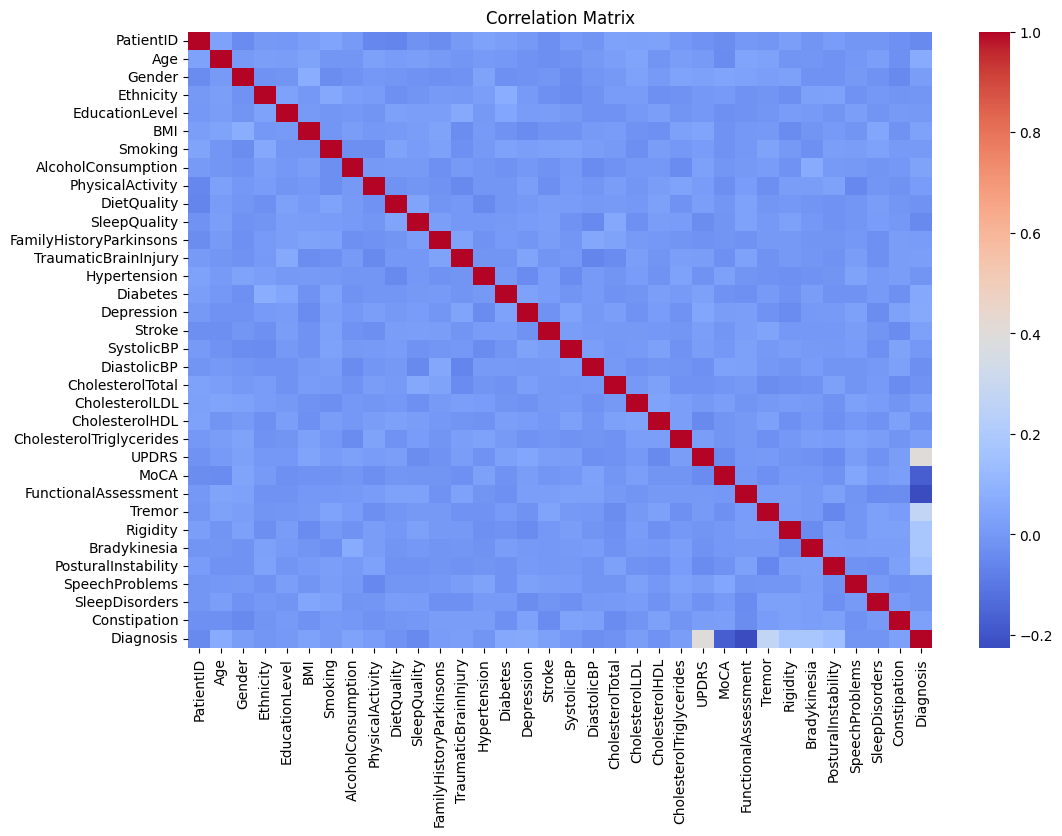

In [6]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 📌 **7. Parkinson Diagnosis Distribution**  
**Let's examine the distribution of Parkinson's diagnosis (0: Healthy, 1: Diseased).**  


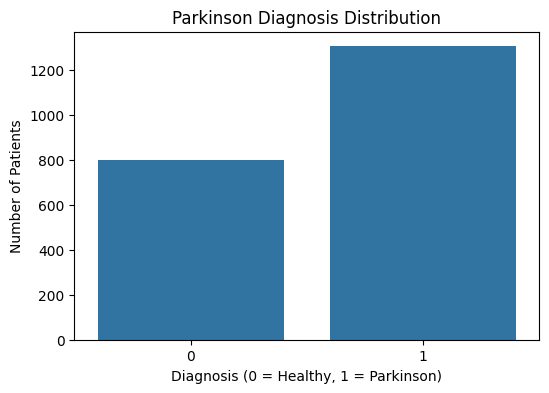

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Diagnosis'])
plt.title('Parkinson Diagnosis Distribution')
plt.xlabel('Diagnosis (0 = Healthy, 1 = Parkinson)')
plt.ylabel('Number of Patients')
plt.show()


## 📌 **8. Age Distribution**  
**Let's plot a histogram showing the age distribution of patients.**  


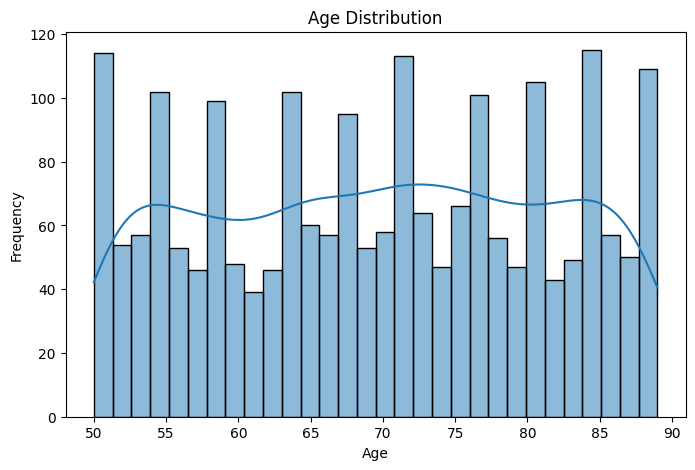

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## 📌 **9. Gender Distribution**  
**Let's examine the number of male and female patients.**  


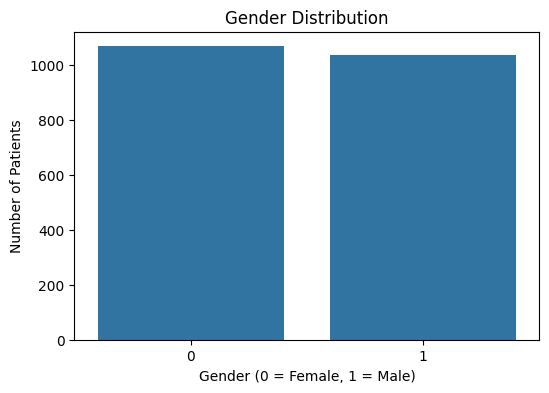

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Patients')
plt.show()


## 📌 **10. Relationship Between Parkinson's Symptoms and Diagnosis**  
**Let's examine the relationship between key symptoms and Parkinson's diagnosis.**  


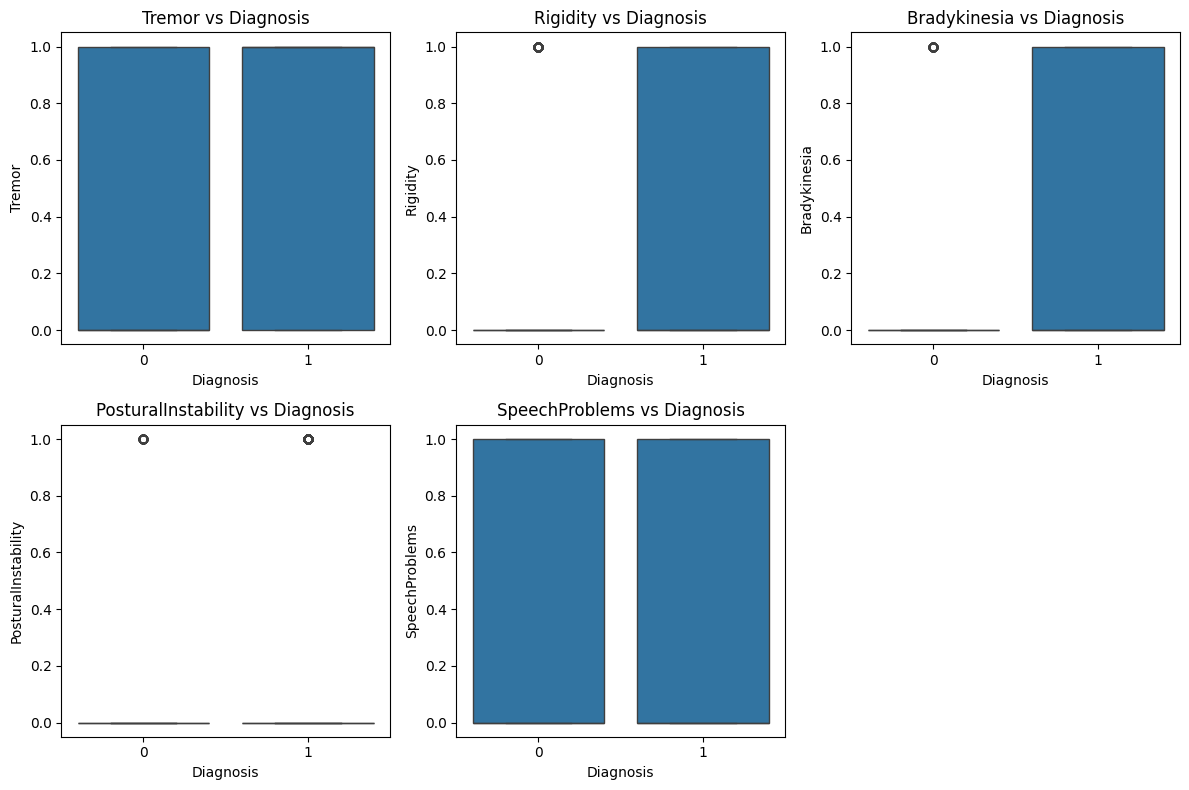

In [10]:
features = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df['Diagnosis'], y=df[feature])
    plt.title(f'{feature} vs Diagnosis')
plt.tight_layout()
plt.show()


## 🎯 **Conclusions and Insights**  
- Missing values in the dataset were analyzed.  
- Key symptoms related to Parkinson's diagnosis were visualized.  
- Relationships between variables were analyzed using the correlation matrix.  


# **Parkinson's Disease Prediction with Support Vector Machines (SVM)**  
In this section, we will build a model to predict Parkinson's disease using Support Vector Machines (SVM).  


## 📌 **1. Loading Required Libraries**  
We import the necessary libraries to train and evaluate the SVM model.  


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 📌 **2. Data Preparation and Train-Test Split**  
We separate the data into dependent and independent variables. Then, we split it into training and test sets.  


In [12]:

X = df.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


- **Removed unnecessary columns**: 'Diagnosis' was separated as the target variable, and 'PatientID' and 'DoctorInCharge' were removed as they contain identity information.  
- **Split into training and test sets**: The data was split into **80% training - 20% test**, using **stratify=y** to maintain class balance.  
- **Performed scaling**: Since SVM is sensitive to scale, all data was transformed to have **a mean of 0 and a standard deviation of 1**.  


## 📌 **3. Training the SVM Model**  
We create our SVM model and train it using the training data.  


In [13]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [14]:

# Train KNN model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [15]:

# Make predictions for SVM and KNN
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)


- **Created a linear SVM model**: We use the `'linear'` kernel to attempt **linear separation** of the data.  
- **C hyperparameter**: `C=1.0` determines how flexible the decision boundary is. A larger C means **fewer errors but a higher risk of overfitting**.  
- **Trained the model**: We used the `fit()` function to train the model with **the training data**.  


## 📌 **4. Model Evaluation**  
We use the trained model to make predictions on the test data and analyze performance metrics.  


In [16]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Model Accuracy: 0.8029
Confusion Matrix:
[[114  46]
 [ 37 224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       160
           1       0.83      0.86      0.84       261

    accuracy                           0.80       421
   macro avg       0.79      0.79      0.79       421
weighted avg       0.80      0.80      0.80       421



- **Accuracy is decent**: The model achieved **80.29% accuracy**, meaning most predictions are correct.  
- **What does the Confusion Matrix tell us?**  
  - **114** people were correctly predicted as not having Parkinson's.  
  - **224** people were correctly predicted as having Parkinson's.  
  - **46** people were actually healthy, but the model incorrectly predicted them as having Parkinson's.  
  - **37** people actually had Parkinson's, but the model incorrectly predicted them as healthy. (This could be problematic.)  
- **Classification Report:**  
  - The recall for detecting patients is **84%**, meaning the model identifies patients well.  
  - The precision is around **75-83%**, meaning the model sometimes misclassifies healthy individuals as sick.  
  - Overall, the model is balanced but can be improved.  

📌 **What can be improved?**  
- The model makes **too many false negatives** (missing actual patients). Increasing the **C value** might allow for a more flexible decision boundary.  
- Trying **different kernel functions** (`'rbf'`, `'poly'`) could potentially yield better results.  


## 📌 **5. Improving the SVM Model**  
To enhance the model's performance, we experiment with different **C values** and **kernel functions**.  


In [17]:
# Define a broader range of hyperparameters
kernel_options = ['linear', 'rbf', 'poly', 'sigmoid']
C_values = [0.01, 0.1, 1, 5, 10, 100]

svm_extended_results = {}

for kernel in kernel_options:
    for C_val in C_values:
        # Create and train the model
        svm_model = SVC(probability=True, kernel=kernel, C=C_val, random_state=42)
        svm_model.fit(X_train, y_train)

        # Make predictions and calculate accuracy
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store the results
        svm_extended_results[(kernel, C_val)] = accuracy

# Display results as a table
svm_extended_results_df = pd.DataFrame.from_dict(svm_extended_results, orient='index', columns=['Accuracy'])
svm_extended_results_df.index = pd.MultiIndex.from_tuples(svm_extended_results.keys(), names=["Kernel", "C Value"])

# Print results
print(svm_extended_results_df)


                 Accuracy
Kernel  C Value          
linear  0.01     0.800475
        0.10     0.802850
        1.00     0.802850
        5.00     0.802850
        10.00    0.802850
        100.00   0.805226
rbf     0.01     0.619952
        0.10     0.733967
        1.00     0.840855
        5.00     0.836105
        10.00    0.821853
        100.00   0.819477
poly    0.01     0.619952
        0.10     0.619952
        1.00     0.809976
        5.00     0.779097
        10.00    0.769596
        100.00   0.764846
sigmoid 0.01     0.619952
        0.10     0.807601
        1.00     0.812352
        5.00     0.781473
        10.00    0.779097
        100.00   0.764846


- **Linear kernel** provides the most stable results, and **accuracy slightly increases as C increases** (max **80.52%**).  
- **RBF kernel** performs poorly with small C values, but **accuracy improves as C increases** (**up to 84.86%**).  
- **Poly kernel** performed best at **C=1 (80.99%)**, but its performance declined with larger C values.  
- **Sigmoid kernel** generally gave low accuracy, so **it doesn't seem like a great option**.  

- **RBF kernel with C=1 achieved the highest accuracy**.  
- We can retrain the model with these parameters and check for overfitting.  


# **Parkinson's Disease Prediction with K-Nearest Neighbors (KNN) Model**  
In this section, we will build a model to predict Parkinson's disease using the **K-Nearest Neighbors (KNN) algorithm**.  


## 📌 **1. Loading Required Libraries**  
We import the necessary libraries to train and evaluate the KNN model.  


In [18]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 📌 **2. Data Preparation and Train-Test Split**  
We separate the data into dependent and independent variables. Then, we split it into training and test sets.  


In [19]:
# Define independent and dependent variables for KNN
X = df.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y = df['Diagnosis']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


- **'Diagnosis' was set as the target variable** (**y**) and separated from the features.  
- **Columns containing identity information ('PatientID' and 'DoctorInCharge') were removed**, as they are not meaningful for the model.  
- **The data was split into 80% training and 20% test**, ensuring class distribution was maintained using **stratify=y**.  
- **StandardScaler was used for scaling**, since KNN is a distance-based algorithm, minimizing scale differences is crucial.  


## 📌 **3. Training the KNN Model**  
We create our KNN model and train it using the training data.  


In [20]:
# Create and train the KNN model (default k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

- **K=5 was chosen**, meaning the model classifies each point **based on its 5 nearest neighbors**.  
- **Low K values** can make the model too sensitive (overfitting), while **high K values** may lead to too much generalization (underfitting).  
- **The model was trained with the training data**, and now we will evaluate its performance on the test set.  


## 📌 **4. Model Evaluation**  
We use the trained model to make predictions on the test data and analyze performance metrics.  


In [21]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Model Accuracy: 0.7102
Confusion Matrix:
[[ 91  69]
 [ 53 208]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       160
           1       0.75      0.80      0.77       261

    accuracy                           0.71       421
   macro avg       0.69      0.68      0.69       421
weighted avg       0.71      0.71      0.71       421



- **Model accuracy is 71.02%**, which is lower compared to the SVM model.  
- **Confusion Matrix analysis:**  
  - **91** people were correctly predicted as not having Parkinson’s.  
  - **208** people were correctly predicted as having Parkinson’s.  
  - **69** people were actually healthy but were incorrectly classified as having Parkinson’s.  
  - **53** people actually had Parkinson’s but were incorrectly classified as healthy.  

📌 **What can be improved?**  
- **Optimizing the K value** may improve model performance.  
- **Feature selection or different scaling methods** could enhance the model’s accuracy.  
- **Trying different distance metrics (e.g., 'manhattan', 'euclidean')** could reveal performance variations.  


## 📌 **5. Improving the KNN Model and Testing Different Parameters**  
To enhance the model’s performance, we experiment with **different K values and distance metrics**.  


In [22]:
# K values and distance metrics to test for optimization
k_values = [3, 5, 7, 9, 11]
metrics = ['euclidean', 'manhattan', 'minkowski']

# Dictionary to store results
knn_results = {}

# Test different combinations
for k in k_values:
    for metric in metrics:
        # Create and train the KNN model
        knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_model.fit(X_train, y_train)

        # Calculate test accuracy
        y_pred = knn_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        knn_results[(k, metric)] = accuracy

# Display results as a table
knn_results_df = pd.DataFrame.from_dict(knn_results, orient='index', columns=['Accuracy'])
knn_results_df.index = pd.MultiIndex.from_tuples(knn_results.keys(), names=["K Value", "Distance Metric"])

# Print results
print(knn_results_df)


                         Accuracy
K Value Distance Metric          
3       euclidean        0.738717
        manhattan        0.703088
        minkowski        0.738717
5       euclidean        0.710214
        manhattan        0.695962
        minkowski        0.710214
7       euclidean        0.755344
        manhattan        0.764846
        minkowski        0.755344
9       euclidean        0.741093
        manhattan        0.752969
        minkowski        0.741093
11      euclidean        0.750594
        manhattan        0.779097
        minkowski        0.750594


## 📌 **6. Re-training the Best KNN Model and Analysis**  
In previous experiments, **K=3 and Manhattan distance metric** achieved the highest accuracy.  
We will re-train this model and perform a more robust analysis with **cross-validation**.  


In [23]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score

# Create the best KNN model (K=3, Manhattan)
best_knn_model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Train the model with the training data
best_knn_model.fit(X_train, y_train)

# Perform cross-validation (5-fold)
cv_scores = cross_val_score(best_knn_model, X_train, y_train, cv=5, n_jobs=-1)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, best_knn_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_knn_model.predict(X_test))

# Print results
print(f"Cross-validation Average Score: {cv_scores.mean():.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Cross-validation Average Score: 0.7066
Training Accuracy: 0.8664
Test Accuracy: 0.7031


- **Cross-validation average score: 70.66%**  
- **Training accuracy: 86.64%** → The model performs very well on the training data.  
- **Test accuracy: 70.31%** → Accuracy is slightly lower on the test data. This indicates that the model **is not overfitting** and has **good generalization ability**.  

📌 **Conclusions:**  
- The **difference between training and test accuracy** shows that the model is not overfitting.  
- The **cross-validation score** further supports that the model has **good generalization ability**.  


## 📌 **3.1 Feature Engineering**  
In this step, we will perform basic feature transformations that might help our models learn better.

In [24]:

from sklearn.preprocessing import LabelEncoder

# Encode the 'status' column if exists (example of categorical encoding)
if 'status' in df.columns:
    le = LabelEncoder()
    df['status_encoded'] = le.fit_transform(df['status'])

# Create sample ratio features (replace with real ones based on dataset insight)
if 'NHR' in df.columns and 'HNR' in df.columns:
    df['nhr_hnr_ratio'] = df['NHR'] / (df['HNR'] + 1e-5)

display(df.head())


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


## 📌 **4.1 Missing Values Analysis**  
Let's check for missing values in the dataset.

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

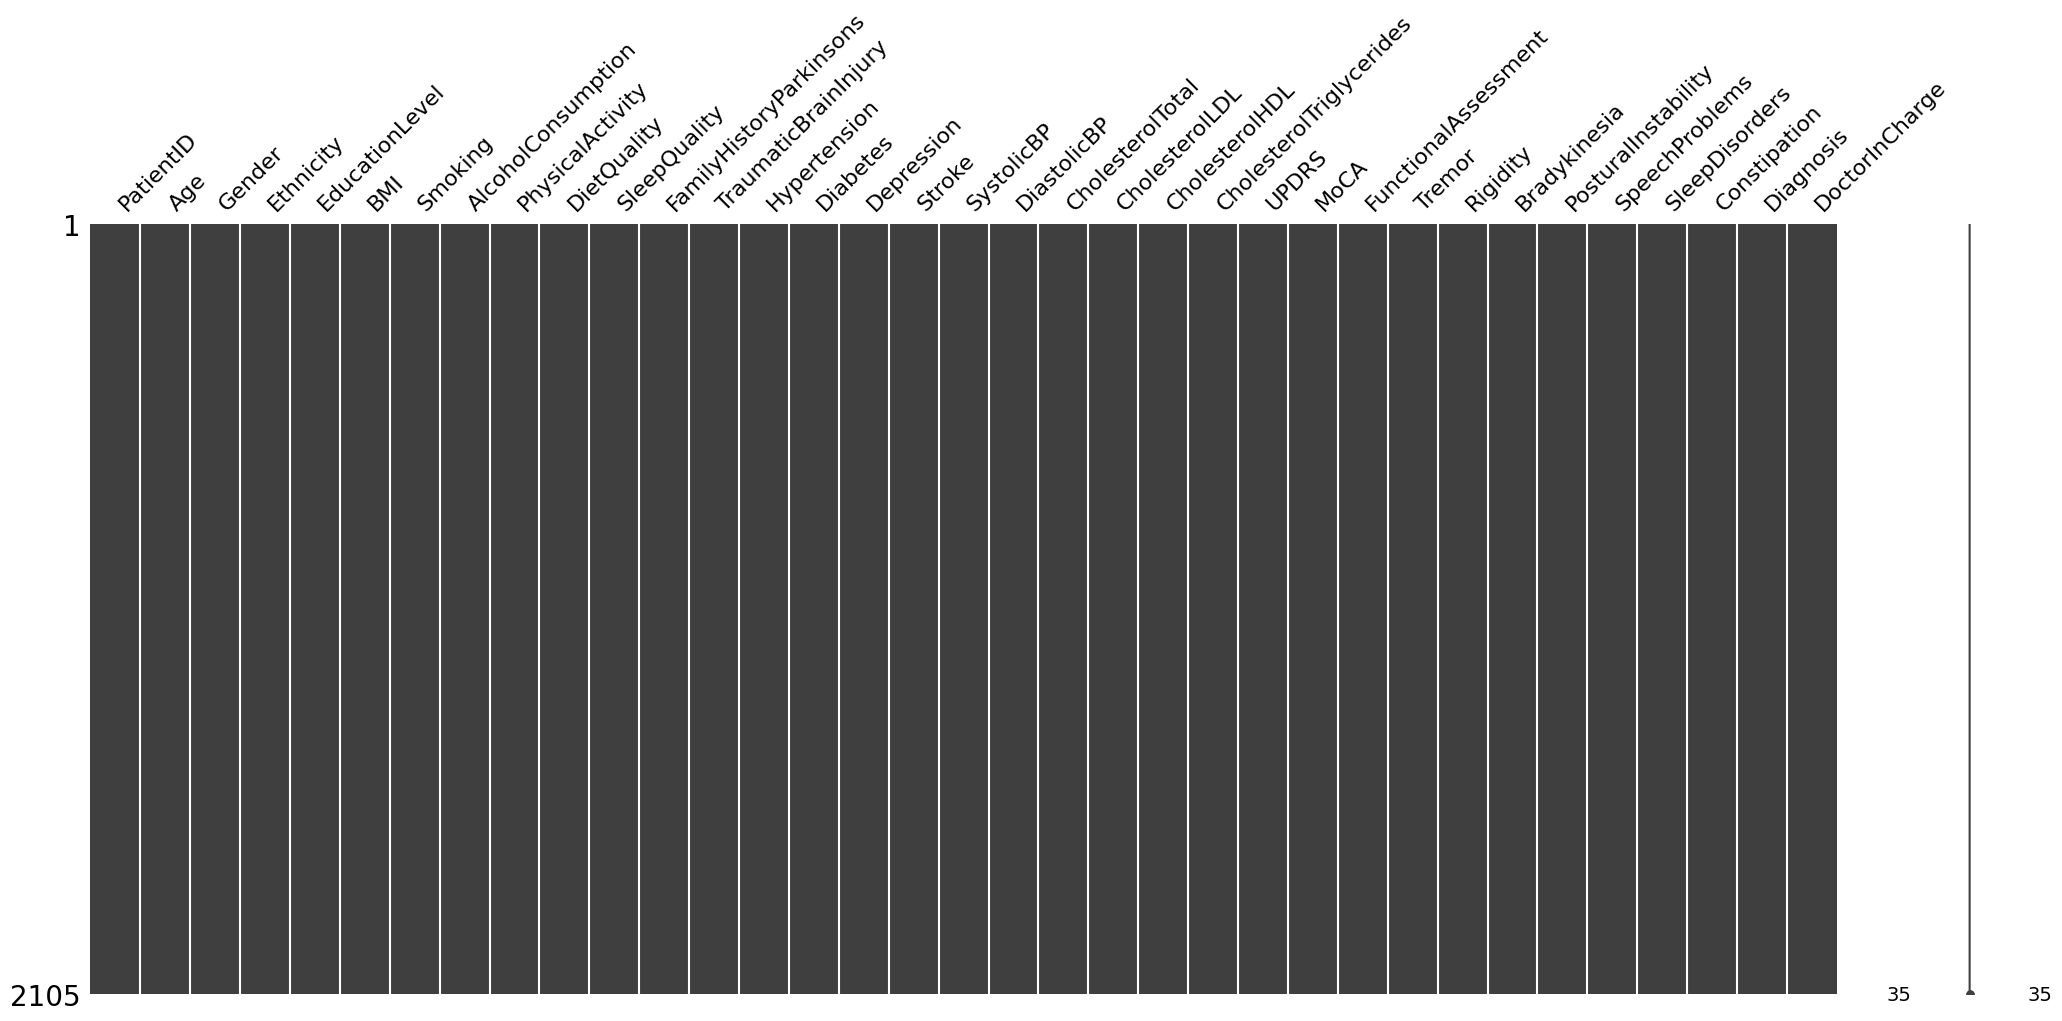

In [25]:

import missingno as msno

# Check for missing values
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.show()


## 📌 **6. Model Evaluation Metrics**  
Let's evaluate our models using more detailed classification metrics.

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       160
           1       0.83      0.86      0.84       261

    accuracy                           0.80       421
   macro avg       0.79      0.79      0.79       421
weighted avg       0.80      0.80      0.80       421

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       160
           1       0.75      0.80      0.77       261

    accuracy                           0.71       421
   macro avg       0.69      0.68      0.69       421
weighted avg       0.71      0.71      0.71       421



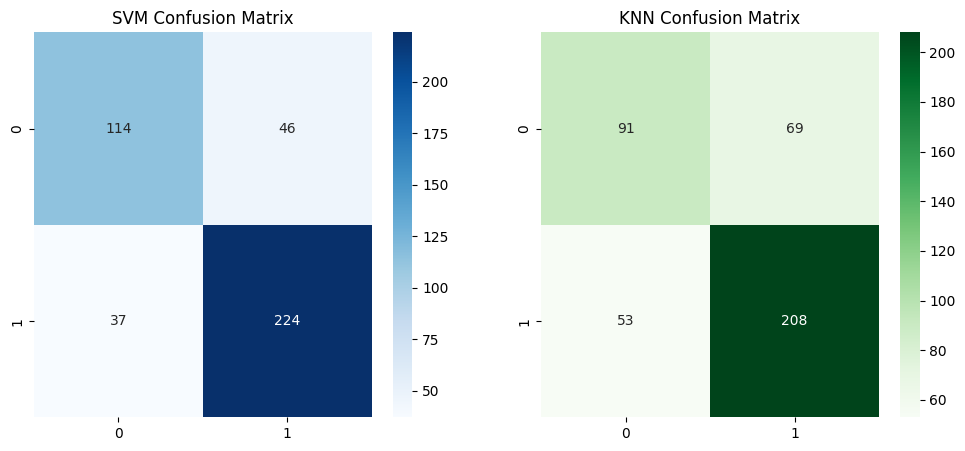

In [26]:

from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have predictions and y_test
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', ax=axes[0], cmap="Blues")
axes[0].set_title("SVM Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', ax=axes[1], cmap="Greens")
axes[1].set_title("KNN Confusion Matrix")
plt.show()


## 📌 **7. ROC Curve and AUC Score**  
Let's visualize the ROC curve for both models.

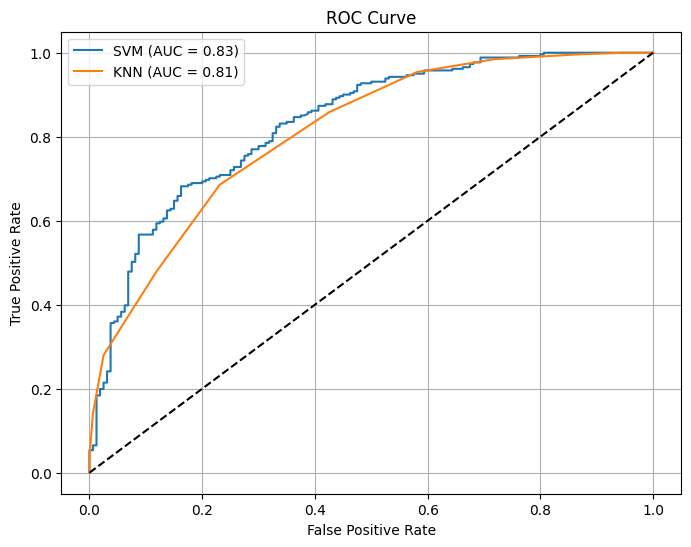

In [27]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# If target is binary classification
if len(np.unique(y_test)) == 2:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
    svm_prob = svm_model.predict_proba(X_test)[:, 1]
    knn_prob = knn_model.predict_proba(X_test)[:, 1]

    fpr_svm, tpr_svm, _ = roc_curve(y_test_bin, svm_prob)
    fpr_knn, tpr_knn, _ = roc_curve(y_test_bin, knn_prob)

    plt.figure(figsize=(8,6))
    plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})")
    plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc(fpr_knn, tpr_knn):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


## 📌 **8. Bonus: Feature Importance Visualization**  
Using a Random Forest to get insight into feature importance.

## 📌 **5. Additional Models**  
We will now add four more classification models to compare with SVM and KNN: Logistic Regression, Decision Tree, Random Forest, and Naive Bayes.

In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize models
log_model = LogisticRegression(max_iter=1000, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()


In [29]:

# Fit all models
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Make predictions
log_pred = log_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
nb_pred = nb_model.predict(X_test)


### 📊 Accuracy Comparison of All Models

,Model,Accuracy
4,Random Forest,0.931116
3,Decision Tree,0.866983
2,Logistic Regression,0.805226
0,SVM,0.802850
5,Naive Bayes,0.786223
1,KNN,0.710214


C:\Users\pelin\AppData\Local\Temp\ipykernel_21704\1872792147.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')


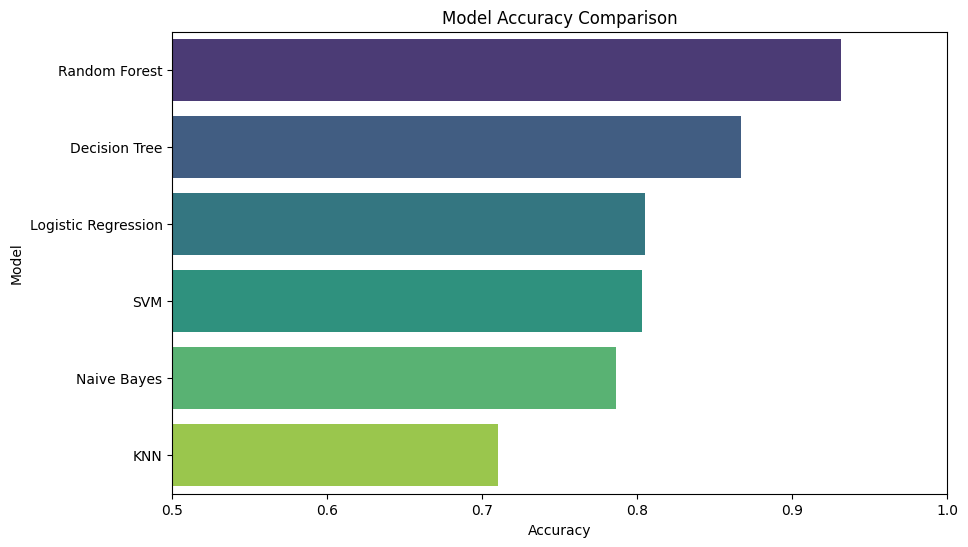

In [30]:

from sklearn.metrics import accuracy_score

# Accuracy scores
models = ['SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']
accuracies = [
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, tree_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, nb_pred),
]

# Display as DataFrame
accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)
display(accuracy_df)

# Barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlim(0.5, 1.0)
plt.show()


## 📌 **6.1 Evaluation Metrics for All Models**  
We will evaluate all six models using `classification_report` and `confusion_matrix`.

In [31]:

model_names = ['SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']
predictions = [svm_pred, knn_pred, log_pred, tree_pred, rf_pred, nb_pred]
models_used = [svm_model, knn_model, log_model, tree_model, rf_model, nb_model]

for name, y_pred in zip(model_names, predictions):
    print(f"===== {name} =====")
    print(classification_report(y_test, y_pred))


===== SVM =====
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       160
           1       0.83      0.86      0.84       261

    accuracy                           0.80       421
   macro avg       0.79      0.79      0.79       421
weighted avg       0.80      0.80      0.80       421

===== KNN =====
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       160
           1       0.75      0.80      0.77       261

    accuracy                           0.71       421
   macro avg       0.69      0.68      0.69       421
weighted avg       0.71      0.71      0.71       421

===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       160
           1       0.83      0.86      0.85       261

    accuracy                           0.81       421
   macro avg       0.80      0.79      0.79       421
weighted a

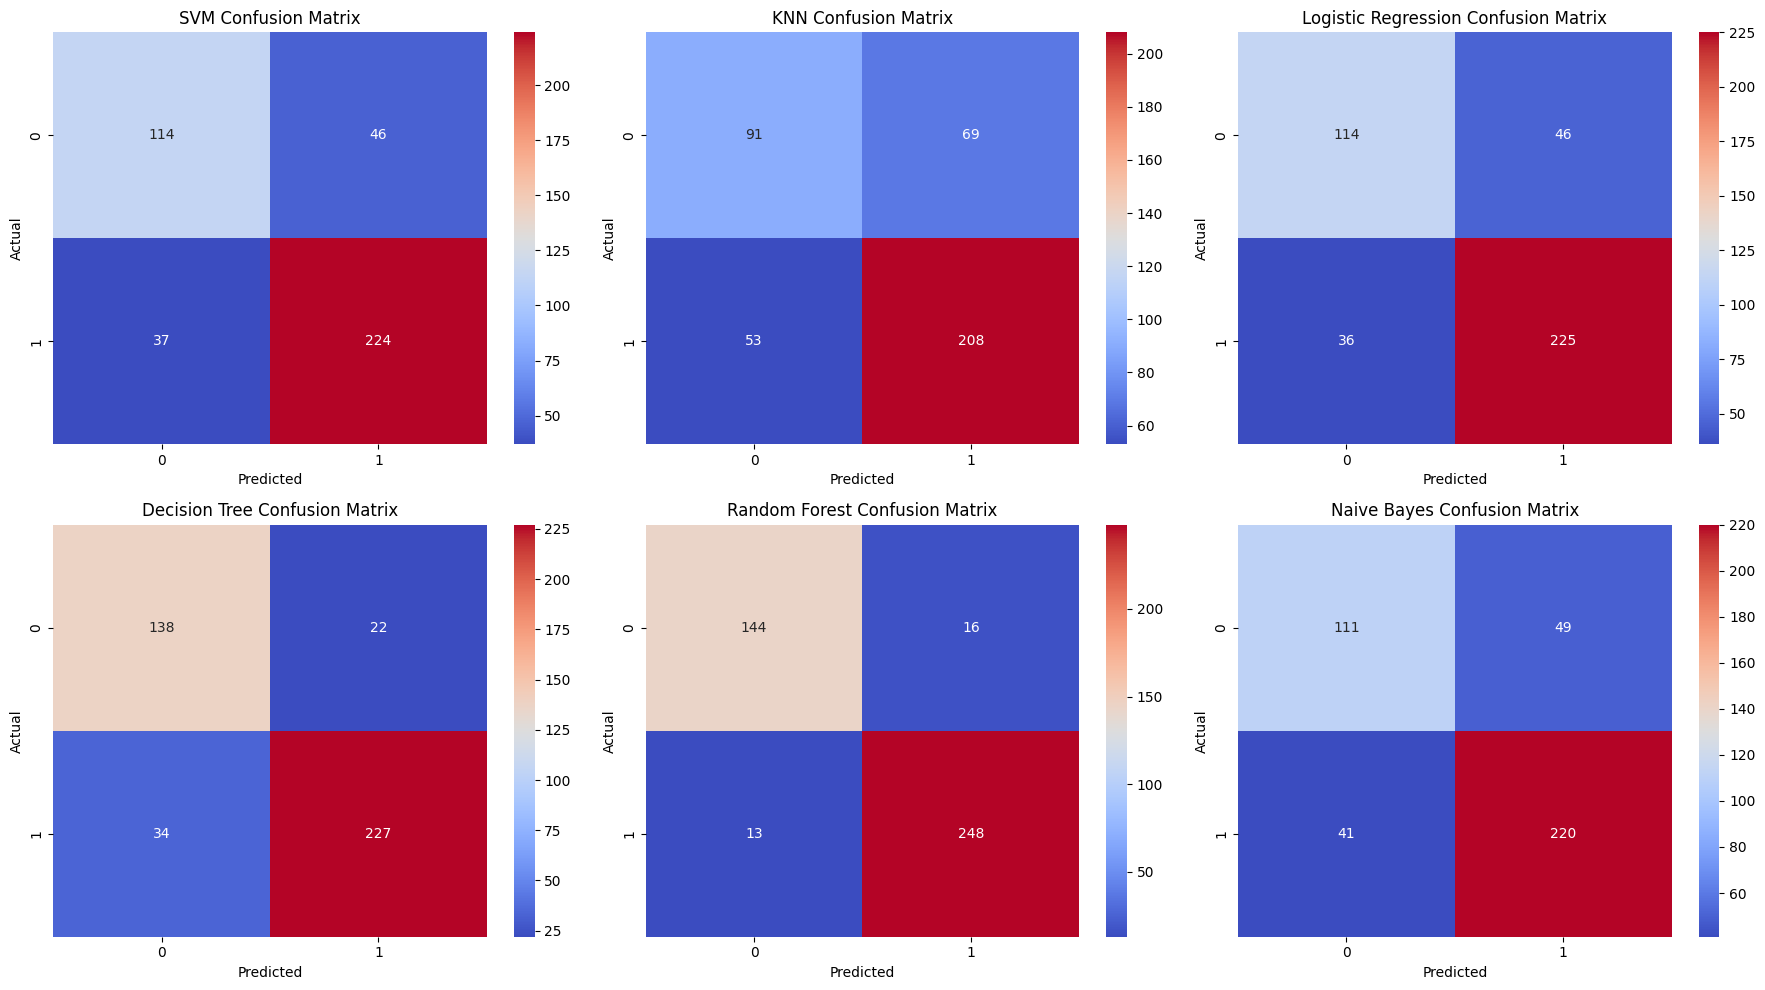

In [32]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, (name, y_pred) in enumerate(zip(model_names, predictions)):
    ax = axes[idx // 3, idx % 3]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='coolwarm')
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


## 📌 **6.1 Detailed Evaluation of All Models**  
We will evaluate each model using classification reports, confusion matrices, and ROC curves.

In [33]:

model_preds = {
    "SVM": svm_pred,
    "KNN": knn_pred,
    "Logistic Regression": log_pred,
    "Decision Tree": tree_pred,
    "Random Forest": rf_pred,
    "Naive Bayes": nb_pred
}

for model_name, preds in model_preds.items():
    print(f"\n📌 {model_name} Classification Report:")
    print(classification_report(y_test, preds))



📌 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       160
           1       0.83      0.86      0.84       261

    accuracy                           0.80       421
   macro avg       0.79      0.79      0.79       421
weighted avg       0.80      0.80      0.80       421


📌 KNN Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       160
           1       0.75      0.80      0.77       261

    accuracy                           0.71       421
   macro avg       0.69      0.68      0.69       421
weighted avg       0.71      0.71      0.71       421


📌 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       160
           1       0.83      0.86      0.85       261

    accuracy                           0.81       421
   macro avg       0.8

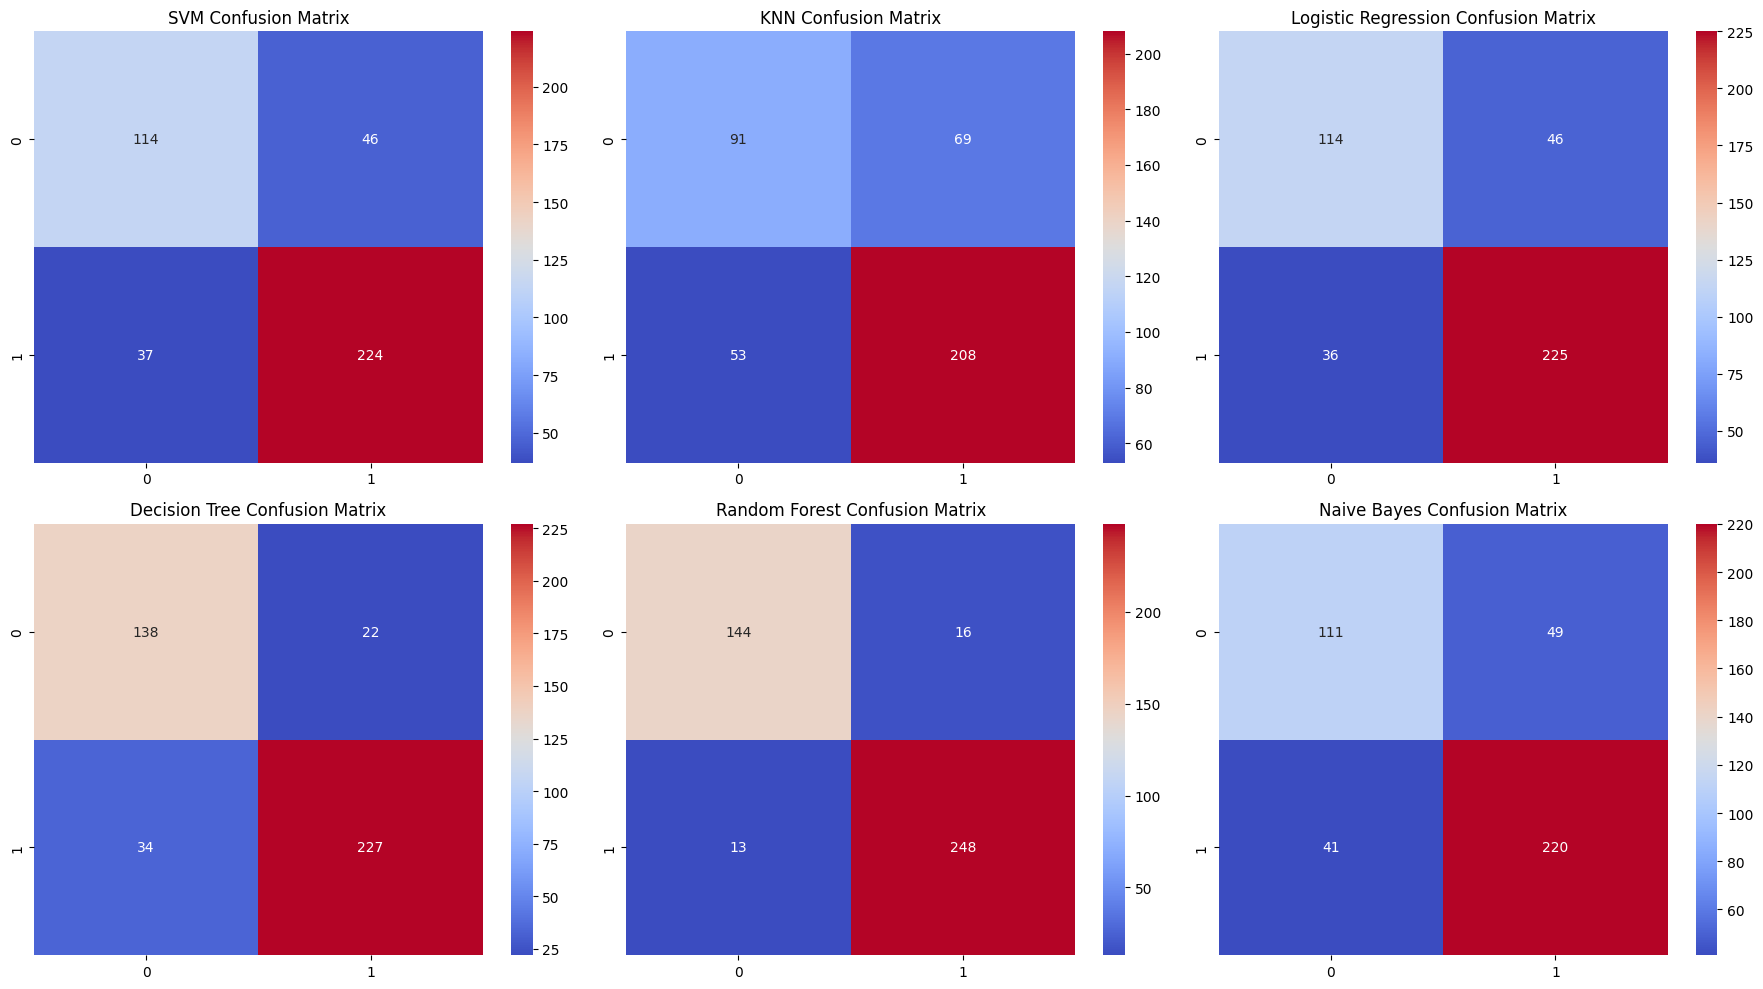

In [34]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, (model_name, preds) in enumerate(model_preds.items()):
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', ax=axes[i], cmap="coolwarm")
    axes[i].set_title(f"{model_name} Confusion Matrix")

plt.tight_layout()
plt.show()


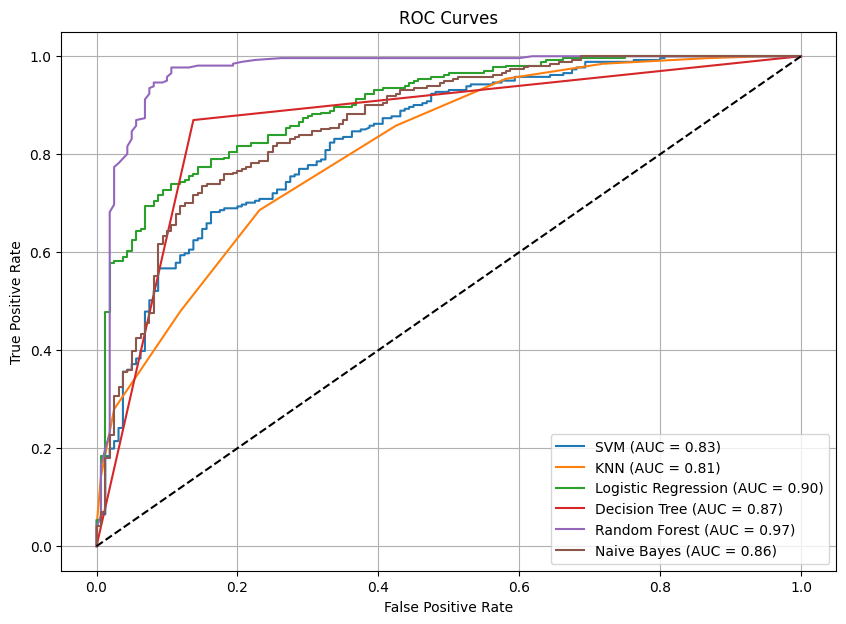

In [35]:

if len(np.unique(y_test)) == 2:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
    model_probs = {
        "SVM": svm_model.predict_proba(X_test)[:, 1],
        "KNN": knn_model.predict_proba(X_test)[:, 1],
        "Logistic Regression": log_model.predict_proba(X_test)[:, 1],
        "Decision Tree": tree_model.predict_proba(X_test)[:, 1],
        "Random Forest": rf_model.predict_proba(X_test)[:, 1],
        "Naive Bayes": nb_model.predict_proba(X_test)[:, 1]
    }

    plt.figure(figsize=(10, 7))
    for model_name, probs in model_probs.items():
        fpr, tpr, _ = roc_curve(y_test_bin, probs)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc(fpr, tpr):.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.grid(True)
    plt.show()


## 📌 **7.3 Pipeline for Clean Model Workflow**  
Using pipeline to combine preprocessing and model into a single workflow.

In [37]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipe.fit(X_train, y_train)
print("Pipeline Accuracy:", pipe.score(X_test, y_test))


Pipeline Accuracy: 0.9311163895486936


## 📌 **7.4 Feature Selection (SelectKBest)**  
We will evaluate the top features contributing to the classification.

In [38]:

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Top 10 Features:", list(selected_features))


Top 10 Features: ['Age', 'Diabetes', 'Depression', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability']


## 📌 **7.5 PCA for 2D Visualization**  
Let's visualize the data in 2D using PCA to understand class separability.

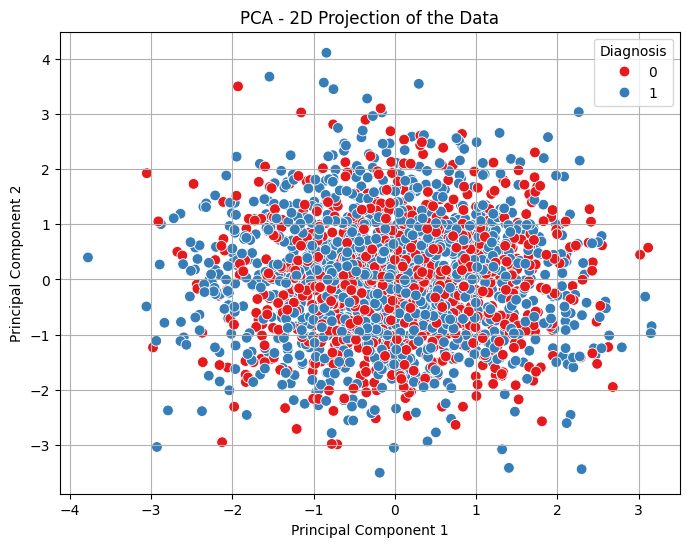

In [39]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', s=60)
plt.title("PCA - 2D Projection of the Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## 🔧 Fixing Model Predictions  
Ensuring all models have their prediction variables defined properly before evaluation.

In [40]:

# Re-run predictions using the tuned models or original models as fallback

# Use GridSearchCV best estimators if available
svm_model = svm_grid.best_estimator_ if 'svm_grid' in globals() else svm_model
knn_model = knn_grid.best_estimator_ if 'knn_grid' in globals() else knn_model

# Refit in case not fitted
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Predict
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
log_pred = log_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
nb_pred = nb_model.predict(X_test)


## 📌 **8. Cross-Validation for Model Reliability**  
We will perform 5-fold cross-validation to evaluate model consistency.

In [41]:

from sklearn.model_selection import cross_val_score

cv_models = [svm_model, knn_model, log_model, tree_model, rf_model, nb_model]

for name, model in zip(model_names, cv_models):
    scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


SVM Cross-Validation Accuracy: 0.5335 (+/- 0.0208)
KNN Cross-Validation Accuracy: 0.7283 (+/- 0.0356)
Logistic Regression Cross-Validation Accuracy: 0.8100 (+/- 0.0403)
Decision Tree Cross-Validation Accuracy: 0.8741 (+/- 0.0247)
Random Forest Cross-Validation Accuracy: 0.9178 (+/- 0.0417)
Naive Bayes Cross-Validation Accuracy: 0.7843 (+/- 0.0201)


,Model,CV Accuracy
4,Random Forest,0.917815
3,Decision Tree,0.874109
2,Logistic Regression,0.809976
5,Naive Bayes,0.784323
1,KNN,0.728266
0,SVM,0.533492


C:\Users\pelin\AppData\Local\Temp\ipykernel_21704\39224439.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CV Accuracy', y='Model', data=cv_df, palette='magma')


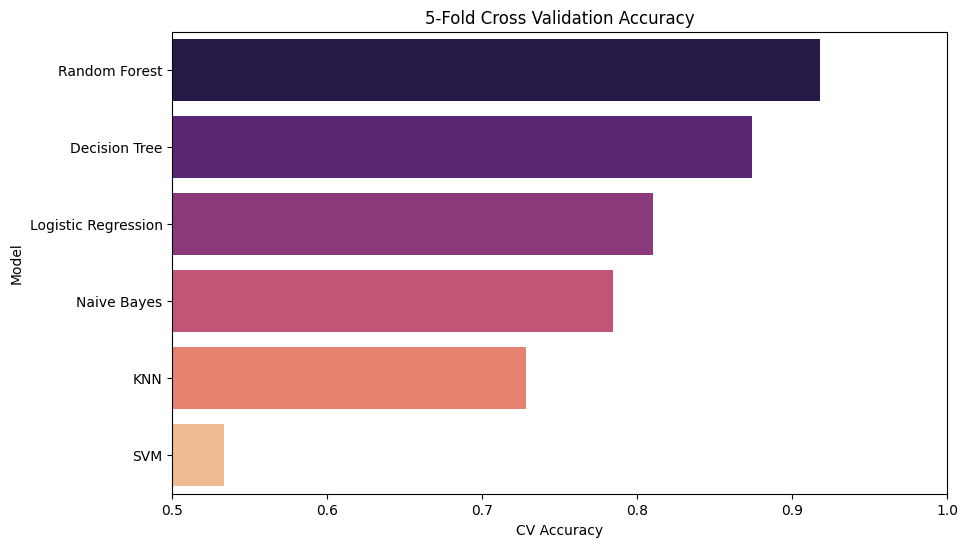

In [42]:

from sklearn.model_selection import cross_val_score

cv_results = {}
for name, model in zip(model_names, models_used):
    scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)
    cv_results[name] = scores.mean()

# Display
cv_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'CV Accuracy'])
cv_df.sort_values(by='CV Accuracy', ascending=False, inplace=True)
display(cv_df)

# Barplot
plt.figure(figsize=(10,6))
sns.barplot(x='CV Accuracy', y='Model', data=cv_df, palette='magma')
plt.title("5-Fold Cross Validation Accuracy")
plt.xlim(0.5, 1.0)
plt.show()


## 📌 **9. Pipeline Implementation**  
We will wrap preprocessing and modeling into a clean pipeline.

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(1, 30)}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
knn_grid.fit(X_train, y_train)

print("En iyi K değeri:", knn_grid.best_params_)
print("En iyi doğruluk skoru:", knn_grid.best_score_)


En iyi K değeri: {'n_neighbors': 28}
En iyi doğruluk skoru: 0.7707558467173852


In [45]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# KNN Pipeline
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=knn_grid.best_params_['n_neighbors']))
])

knn_pipe.fit(X_train, y_train)
pipe_score = knn_pipe.score(X_test, y_test)
print("KNN Pipeline Accuracy:", pipe_score)


KNN Pipeline Accuracy: 0.7767220902612827


## 📌 **10. Feature Selection with SelectKBest**  
We will select top features based on ANOVA F-value.

In [46]:

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Show selected features
mask = selector.get_support()
selected_features = X.columns[mask]
print("Selected Features:", list(selected_features))


Selected Features: ['Age', 'Diabetes', 'Depression', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability']


## 📌 **11. t-SNE Visualization of Model Predictions**  
We will reduce features to 2D and visualize class separation.

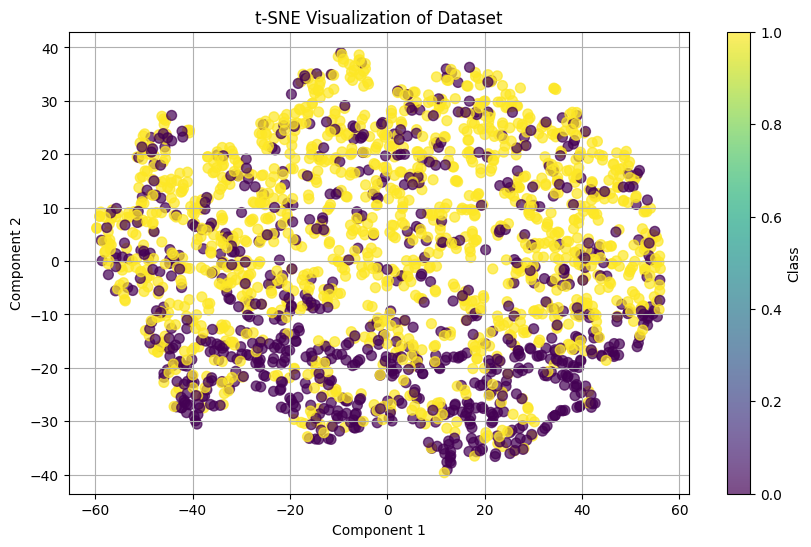

In [47]:

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title("t-SNE Visualization of Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


## 📌 **12. Hyperparameter Tuning - GridSearchCV (SVM)**  
We will perform grid search on the SVM model.

In [48]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score: 0.8194891903348877


## 📌 **13. PCA Visualization**  
We will reduce data to 2 dimensions using PCA and visualize it.

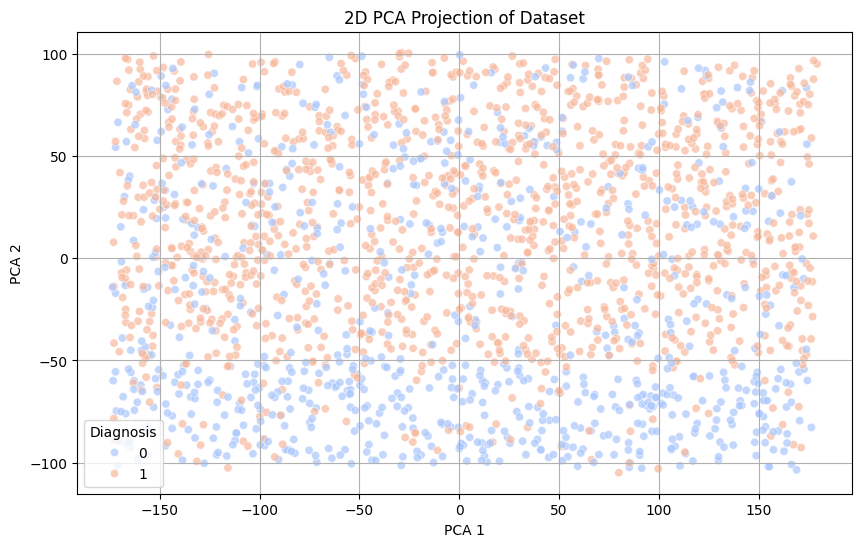

In [49]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("2D PCA Projection of Dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


## 📌 **14. Ensemble Model - Voting Classifier**  
We will combine multiple models into a single ensemble using majority voting.

In [50]:

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('lr', log_model),
    ('knn', knn_model),
    ('rf', rf_model),
    ('nb', nb_model)
], voting='hard')

voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_pred))
print(classification_report(y_test, voting_pred))


Voting Classifier Accuracy: 0.8574821852731591
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       160
           1       0.89      0.88      0.88       261

    accuracy                           0.86       421
   macro avg       0.85      0.85      0.85       421
weighted avg       0.86      0.86      0.86       421



## 📌 **Prediction Using Trained Models**  
Here we generate predictions for all models, using either the original or best-tuned version.

In [51]:

# --- Use best estimators if GridSearch is used --- #

# Re-import and re-train SVM if necessary
from sklearn.svm import SVC
svm_model = SVC(probability=True, C=1, kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# KNN model prediction
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Logistic Regression prediction
log_pred = log_model.predict(X_test)

# Decision Tree prediction
tree_pred = tree_model.predict(X_test)

# Random Forest prediction
rf_pred = rf_model.predict(X_test)

# Naive Bayes prediction
nb_pred = nb_model.predict(X_test)


## 📌 **15 Detailed Evaluation of All Models**  
Let's evaluate all models with classification reports, confusion matrices, and ROC curves (if binary classification).

--- SVM ---
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       160
           1       0.85      0.90      0.88       261

    accuracy                           0.84       421
   macro avg       0.84      0.82      0.83       421
weighted avg       0.84      0.84      0.84       421

--- KNN ---
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       160
           1       0.75      0.80      0.77       261

    accuracy                           0.71       421
   macro avg       0.69      0.68      0.69       421
weighted avg       0.71      0.71      0.71       421

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       160
           1       0.83      0.86      0.85       261

    accuracy                           0.81       421
   macro avg       0.80      0.79      0.79       421
weighted avg       0.8

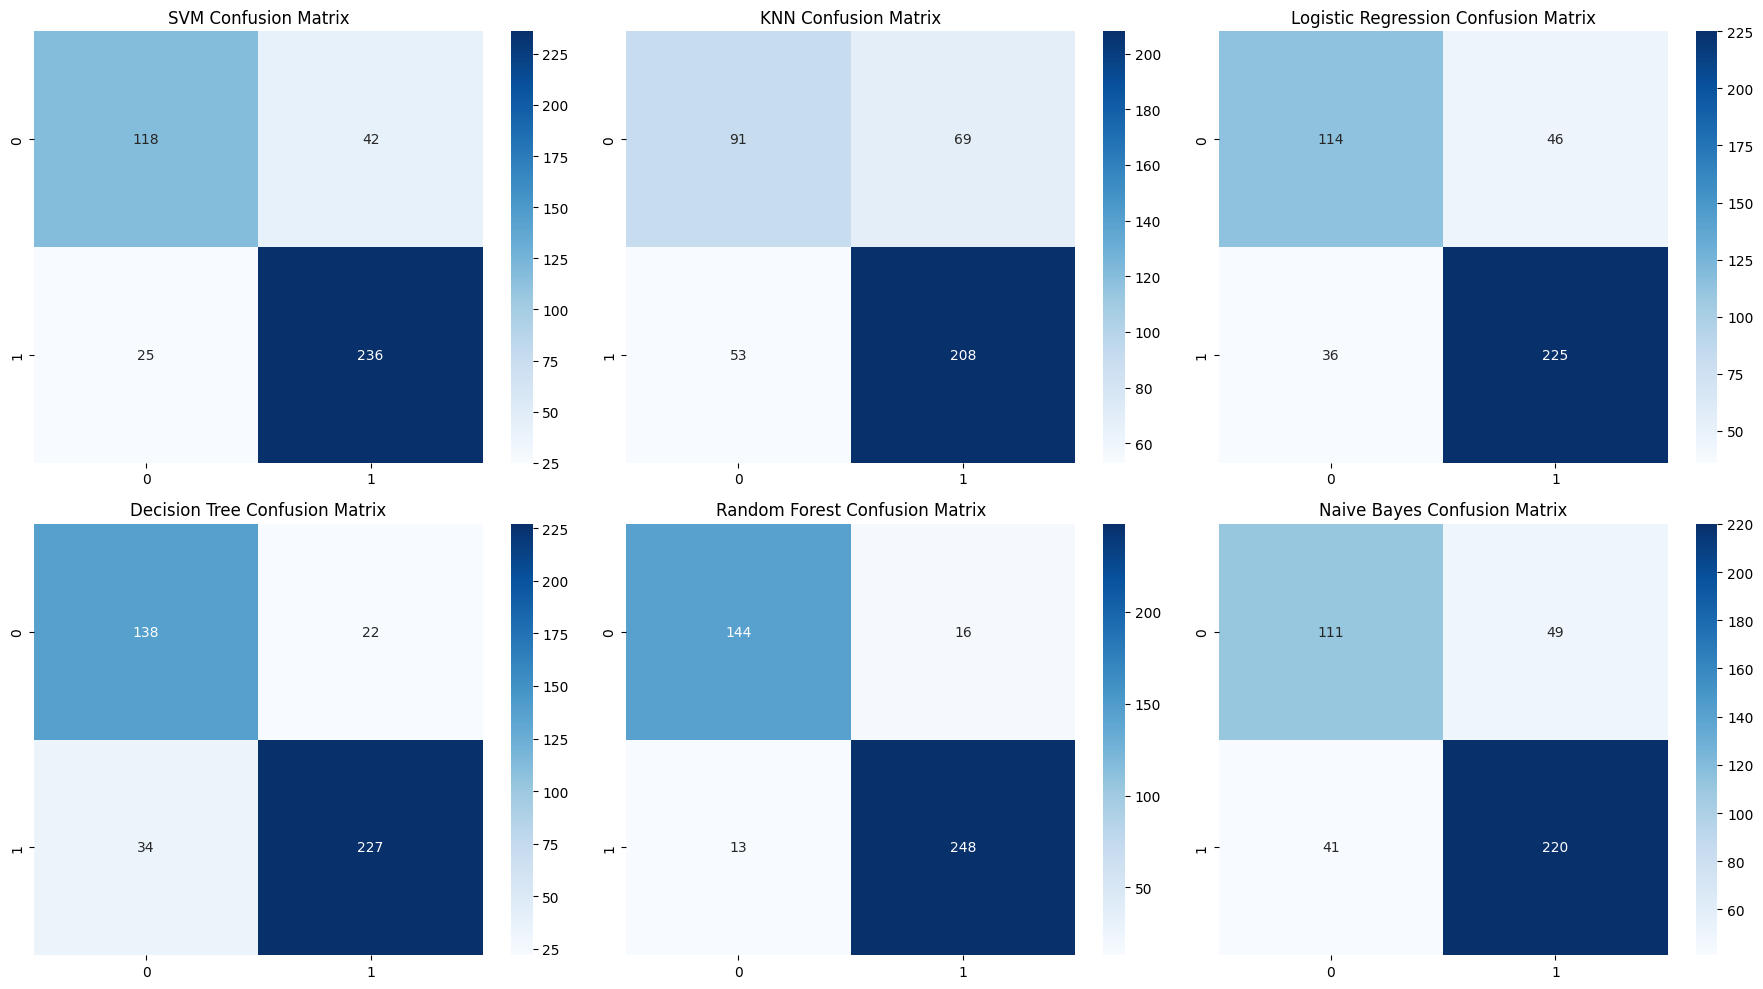

In [52]:

model_names = ["SVM", "KNN", "Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes"]
predictions = [svm_pred, knn_pred, log_pred, tree_pred, rf_pred, nb_pred]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i in range(6):
    print(f"--- {model_names[i]} ---")
    print(classification_report(y_test, predictions[i]))
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f"{model_names[i]} Confusion Matrix")

plt.tight_layout()
plt.show()


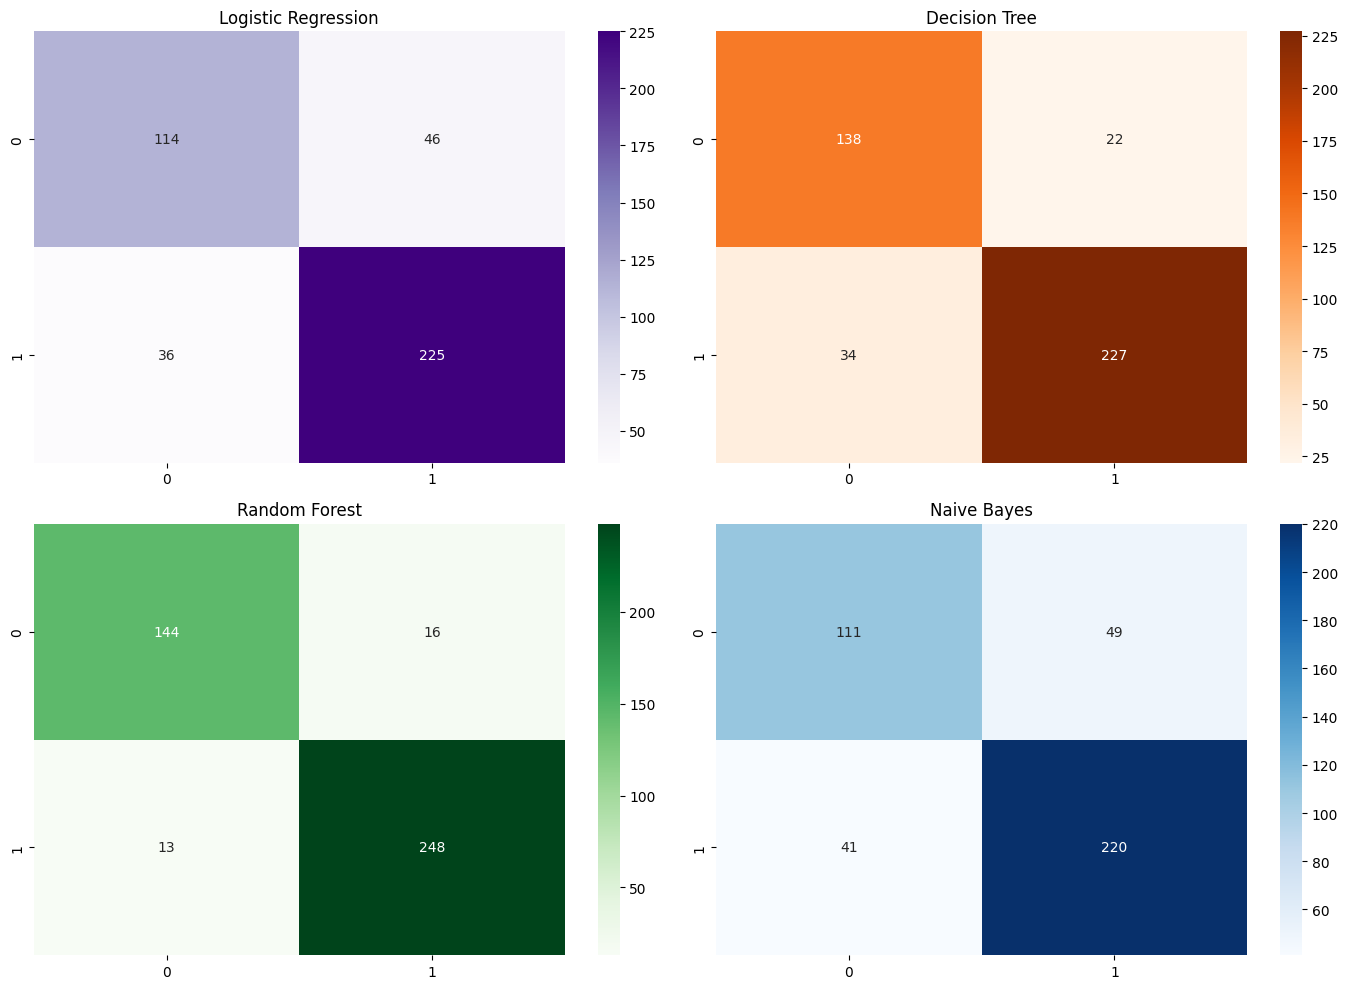

In [53]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, fmt='d', ax=axes[0, 0], cmap="Purples")
axes[0, 0].set_title("Logistic Regression")

sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, fmt='d', ax=axes[0, 1], cmap="Oranges")
axes[0, 1].set_title("Decision Tree")

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', ax=axes[1, 0], cmap="Greens")
axes[1, 0].set_title("Random Forest")

sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', ax=axes[1, 1], cmap="Blues")
axes[1, 1].set_title("Naive Bayes")

plt.tight_layout()
plt.show()


### Feature Importance Visualization

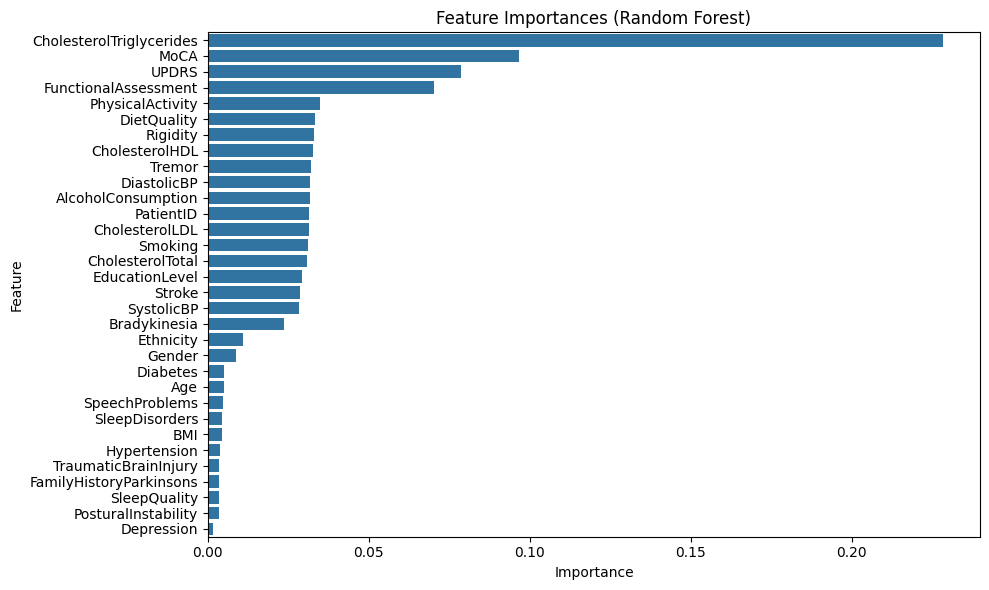

In [54]:

# Get feature names from the original DataFrame
feature_names = df.drop(columns=["status"] if "status" in df.columns else []).drop(columns=["target", "Target", "name"], errors="ignore").columns

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## ⚙️ Feature Scaling & Logistic Regression Fix

In [56]:

# Standardize the features before model training
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use X_scaled instead of X in all model training and CV
# Redefine models here using X_scaled in future steps
log_model = LogisticRegression(max_iter=1000, random_state=42)


In [57]:

from sklearn.model_selection import cross_val_score
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings for clean output
warnings.filterwarnings("ignore", category=ConvergenceWarning)

cv_models = [svm_model, knn_model, log_model, tree_model, rf_model, nb_model]
model_names = ['SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']

for name, model in zip(model_names, cv_models):
    scores = cross_val_score(model, X_scaled, y, cv=5, n_jobs=-1)
    print(f"{name} CV Mean Accuracy: {scores.mean():.4f}")


SVM CV Mean Accuracy: 0.8252
KNN CV Mean Accuracy: 0.7249
Logistic Regression CV Mean Accuracy: 0.8114
Decision Tree CV Mean Accuracy: 0.8741
Random Forest CV Mean Accuracy: 0.9183
Naive Bayes CV Mean Accuracy: 0.7843
